# Distribution of "empty" cells

An "empty" cell is defined as having one of the following characteristics:

1. No genes
2. No mitochondria
3. No RNA

These characteristics correspond to the following features that were engineered during preprocessing:

1. `zero_genes`
2. `zero_mito`
3. `zero_count`

## 0. Initializations

In [1]:
# -- imports --
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from signals_in_the_noise.preprocessing.gse161529 import GSE161529
from signals_in_the_noise.utilities.storage import get_resources_path
from signals_in_the_noise.utilities.visualization import get_figure_axes

In [2]:
# -- datasets --
gse = GSE161529()

2025-07-28 21:01:42,255 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-07-28 21:01:42,346 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-07-28 21:01:42,489 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-07-28 21:01:42,548 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-07-28 21:01:42,690 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

In [3]:
all_real, all_noise = gse.get_combined_epithilial_dataset(hvg_post_stromal=True)

2025-07-28 21:01:47,164 [INFO] signals_in_the_noise.preprocessing.gse161529: Combining datasets...


Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to highly variable genes...
Log normalizing dataset...
Filtering dataset to hig

C:\Users\silly\GitHub\signals-in-the-noise\src\signals_in_the_noise\preprocessing\gse161529.py:416: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=resolution, random_state=self.random_seed)
2025-07-28 21:02:40,460 [INFO] openTSNE.tsne: Precomputed initialization provided. Ignoring initalization-related parameters.
2025-07-28 21:02:40,468 [INFO] openTSNE.tsne: Automatically determined negative gradient method `fft`
2025-07-28 21:02:50,860 [INFO] openTSNE.tsne: Automatically determined negative gradient method `fft`
C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


## 1. "Real" cells

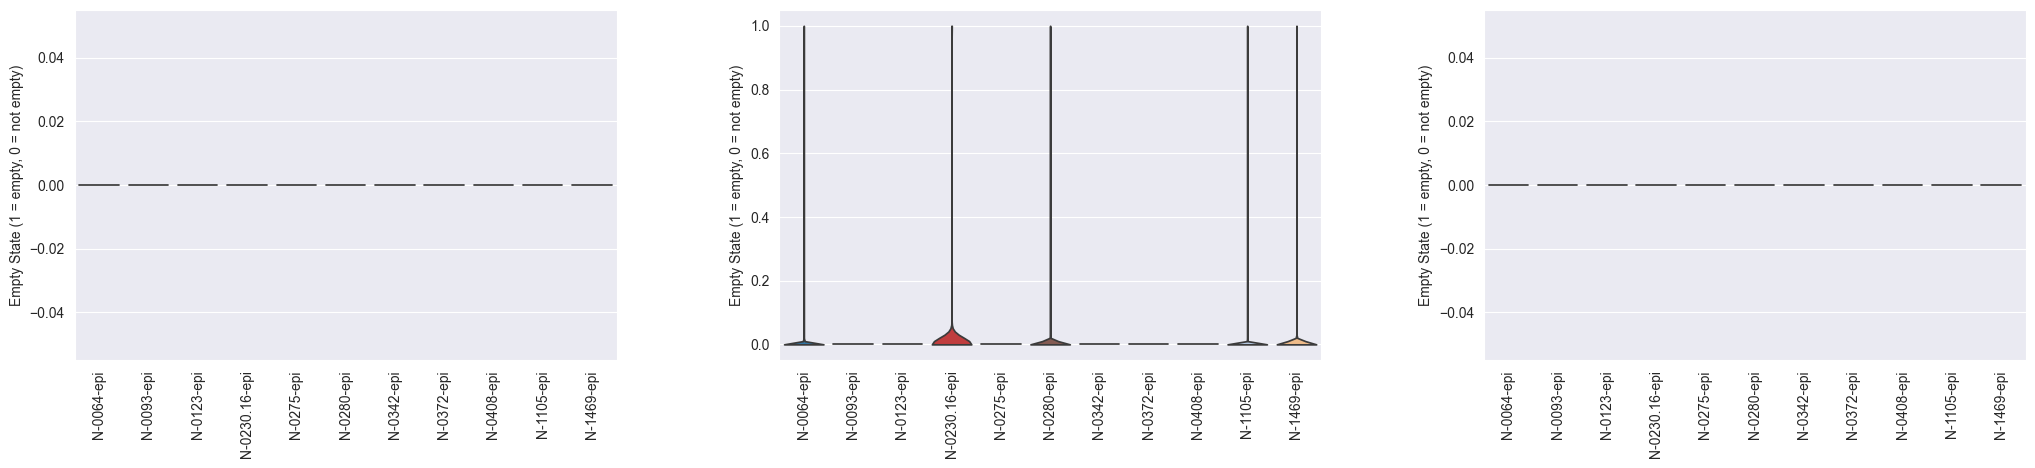

In [4]:
sc.pl.violin(
    all_real,
    keys=['zero_genes', 'zero_mito', 'zero_count'],
    groupby='specimen_id',
    stripplot=False,
    jitter=0,
    multi_panel=True,
    rotation=90,
    ylabel='Empty State (1 = empty, 0 = not empty)',
)

## 2. "Noise" cells

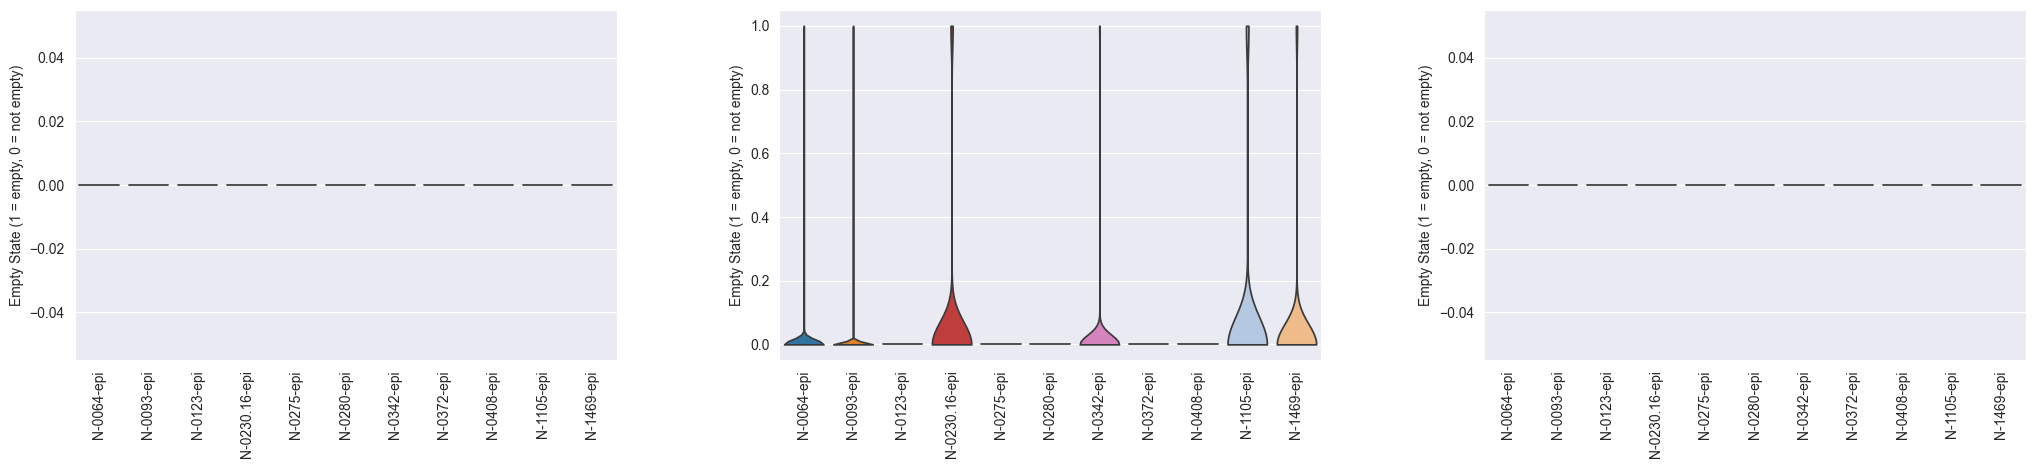

In [5]:
sc.pl.violin(
    all_noise,
    keys=['zero_genes', 'zero_mito', 'zero_count'],
    groupby='specimen_id',
    stripplot=False,
    jitter=0,
    multi_panel=True,
    rotation=90,
    ylabel='Empty State (1 = empty, 0 = not empty)',
)

## 3. Deeper dive into zero mitochondria

For this next step, recombine the two datasets and visualize violin plots grouping by other characteristics.

In [6]:
adata = ad.concat([all_real, all_noise], join='inner')

In [7]:
violin_kwargs = {
    'show': False,
    'keys': 'zero_mito',
    'rotation': 90,
    'ylabel': 'Empty State (1 = empty, 0 = not empty)',
}

def plot_violins(groupby):
    fig, axes = get_figure_axes(2, 2, subplot_size=(7, 8))
    fig.suptitle("Distribution of Zero Mitochondria")
    axes[0].set_title('"Noise" cells')
    axes[1].set_title('All cells')
    sc.pl.violin(
        all_noise,
        groupby=groupby,
        ax=axes[0],
        **violin_kwargs
    )
    sc.pl.violin(
        adata,
        groupby=groupby,
        ax=axes[1],
        **violin_kwargs
    )

    plt.tight_layout()
    plt.show()

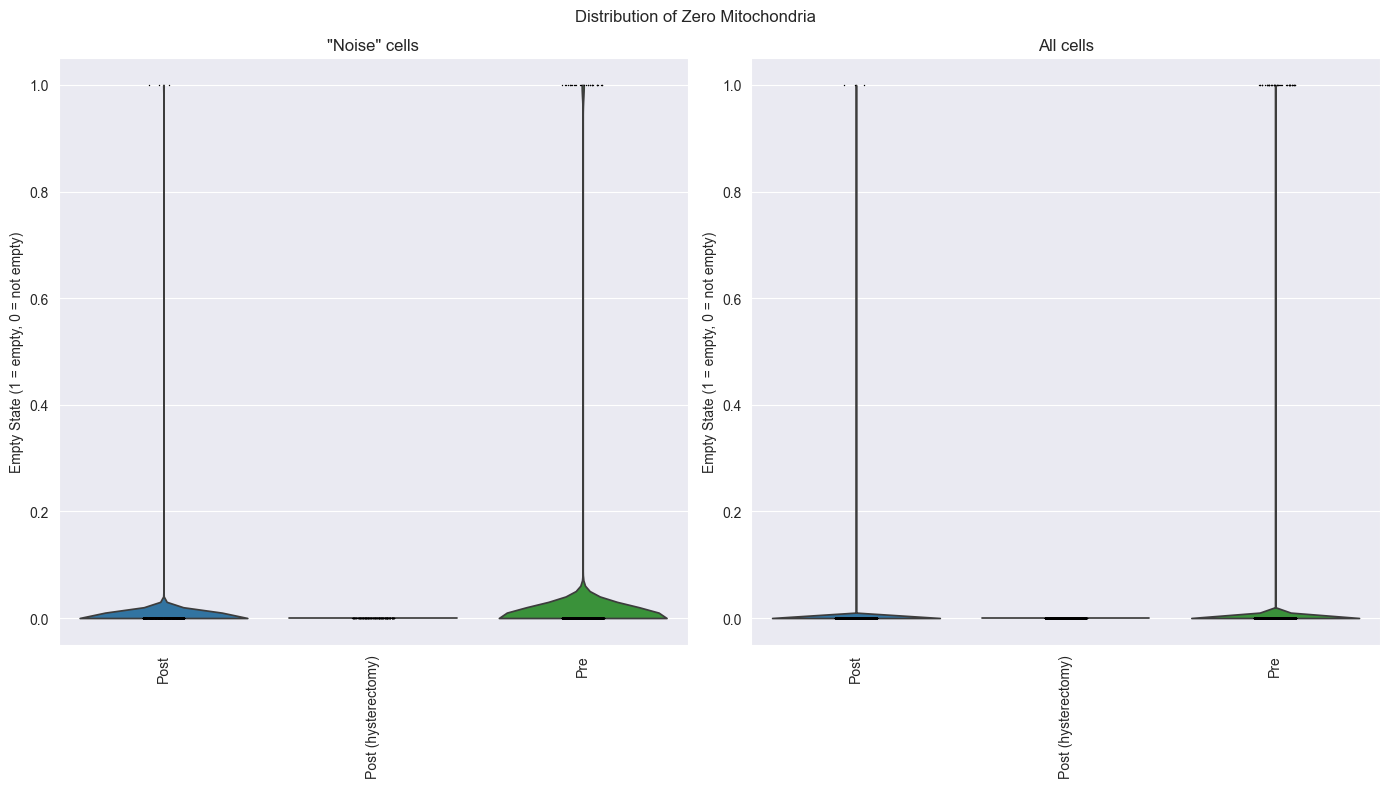

In [8]:
plot_violins('hormonal_status')

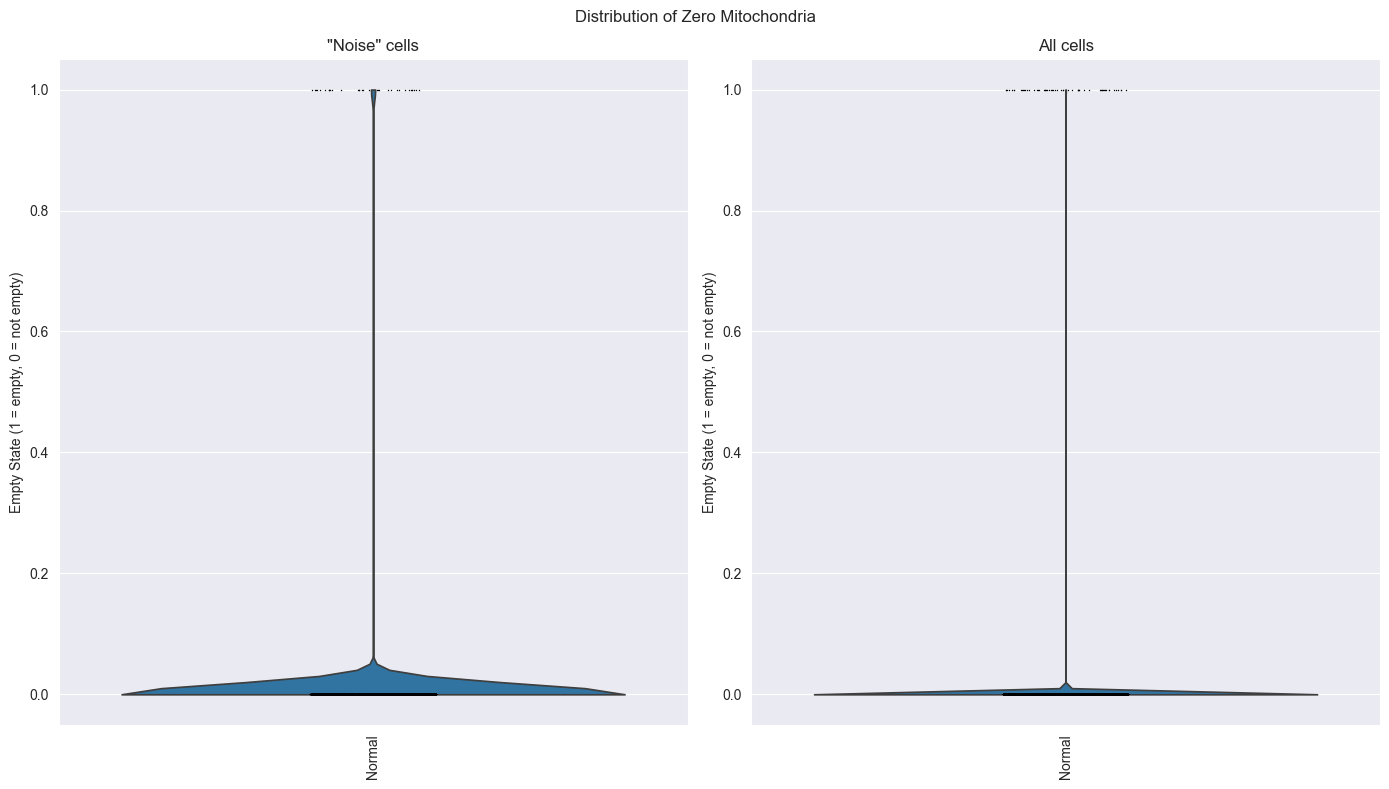

In [9]:
plot_violins('cancer_type')

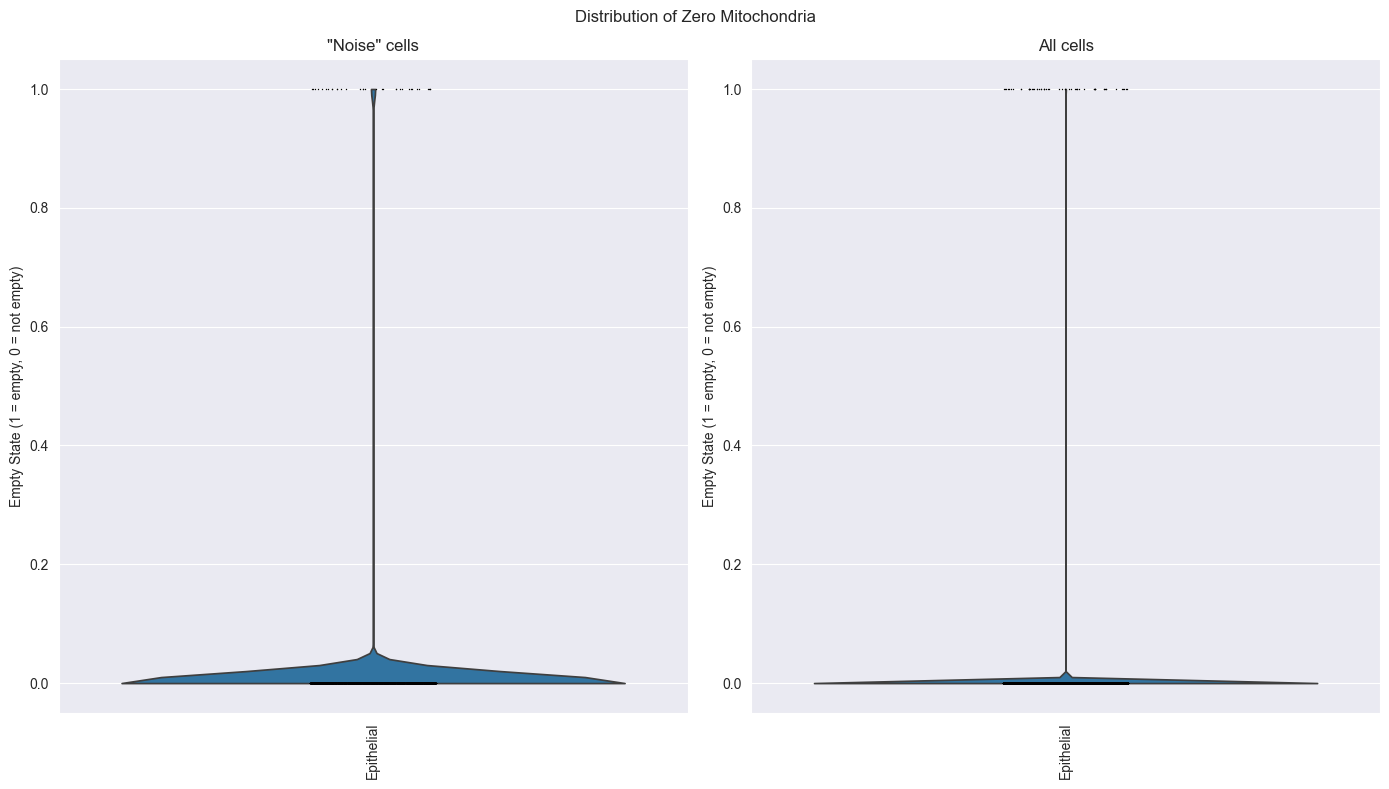

In [10]:
plot_violins('cell_population')

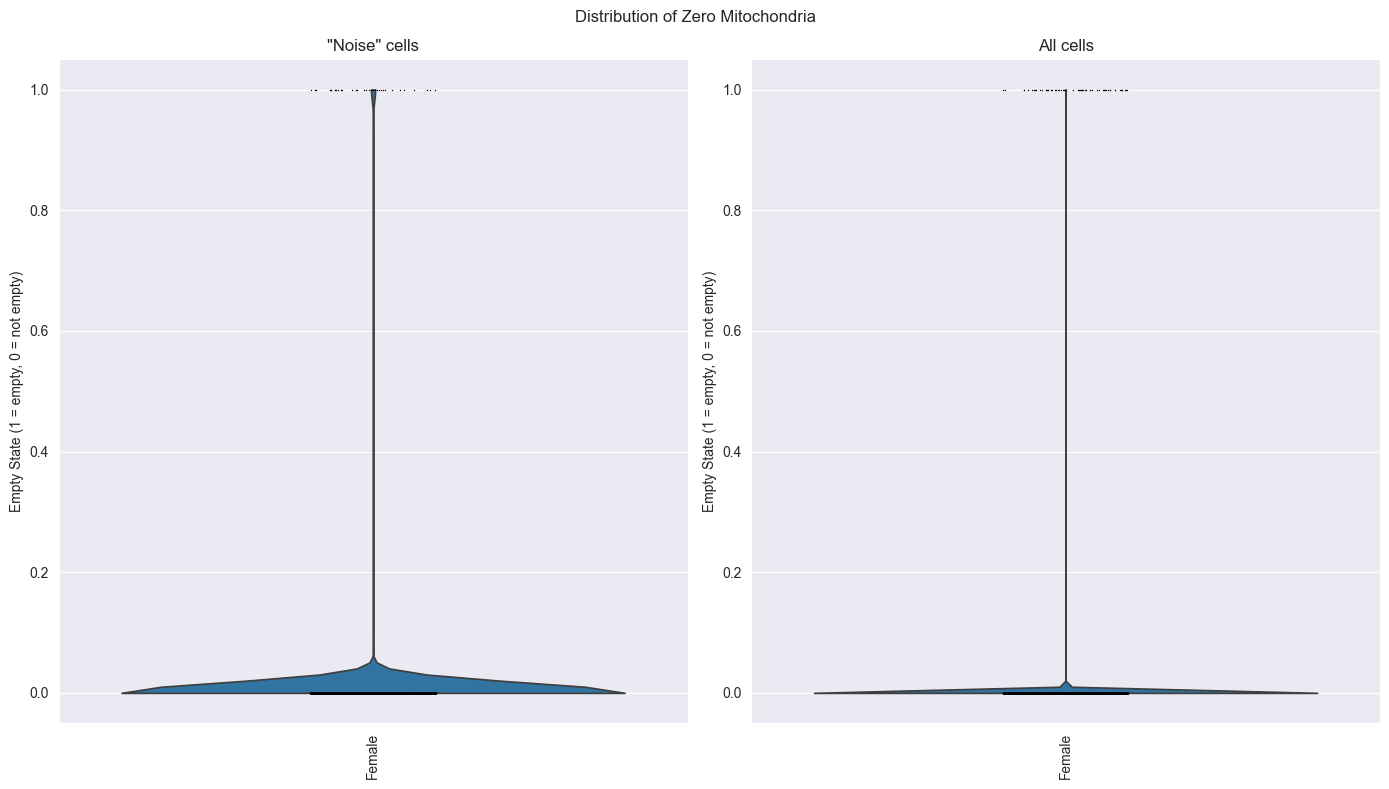

In [11]:
plot_violins('gender')

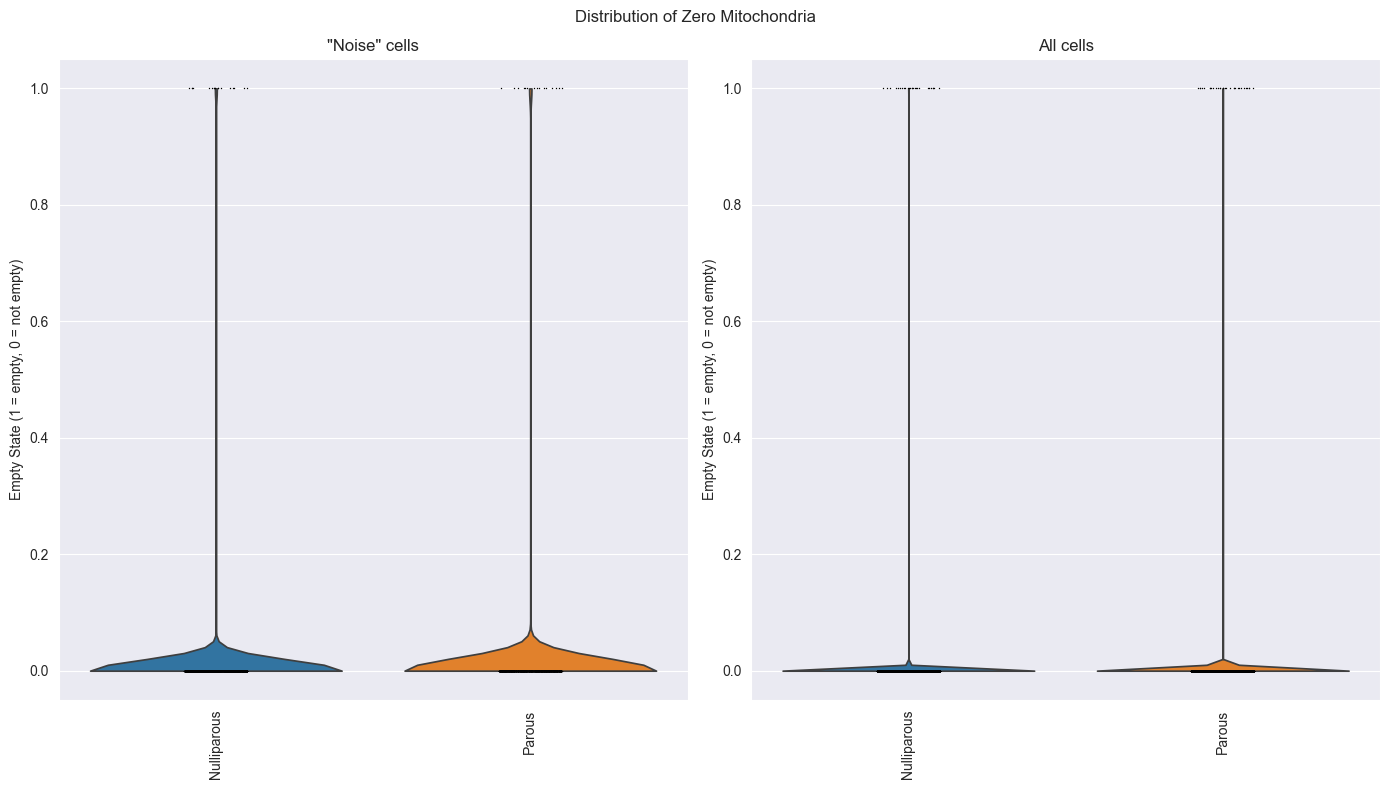

In [12]:
plot_violins('parity')

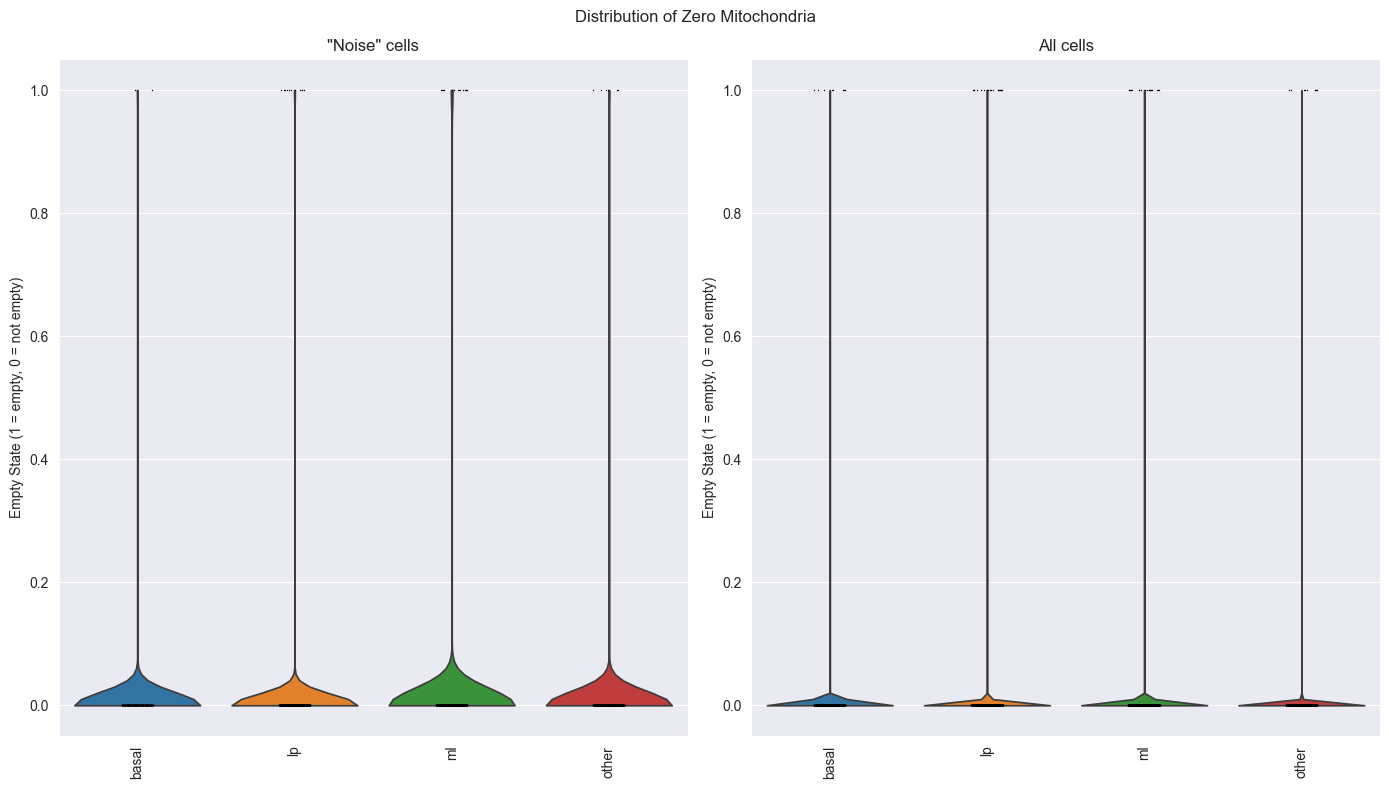

In [13]:
plot_violins('predicted_type')

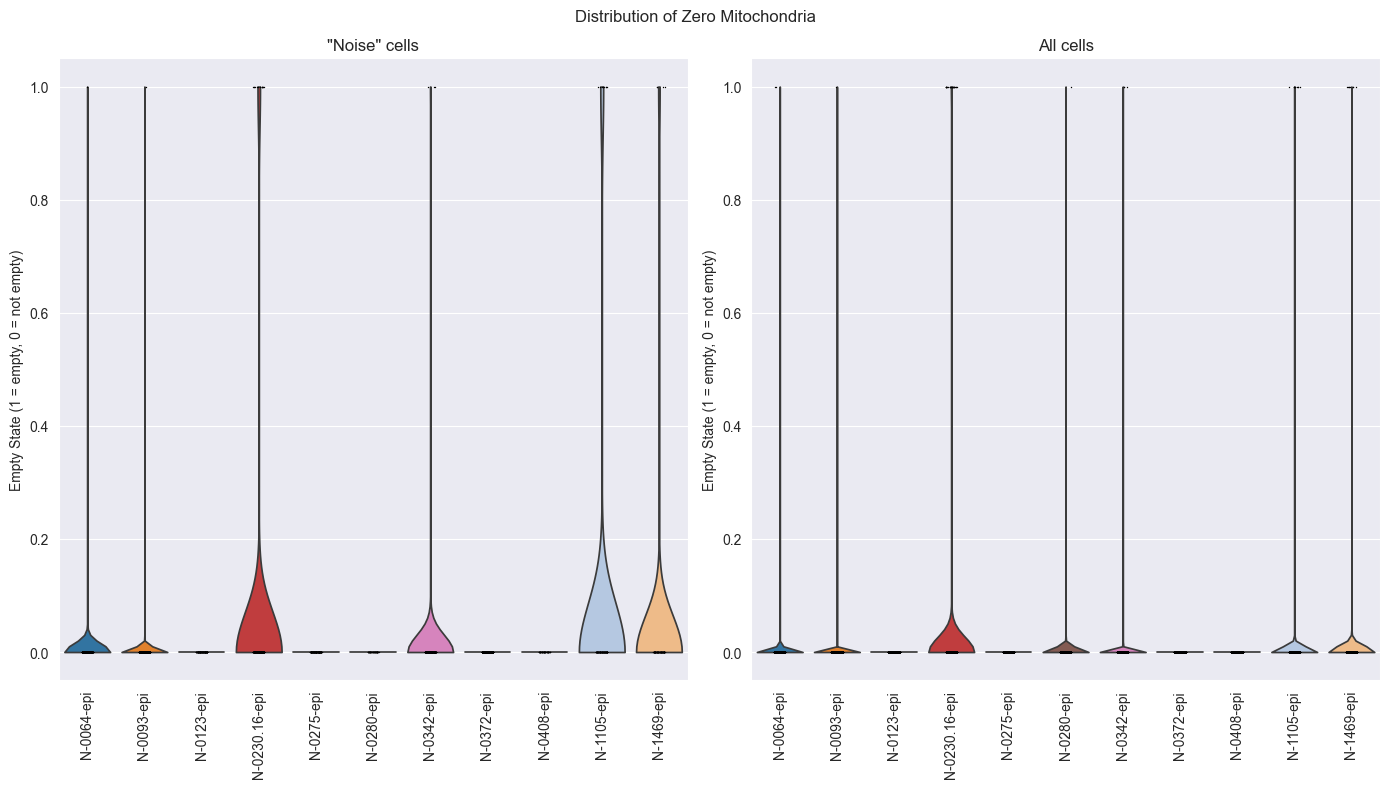

In [14]:
plot_violins('specimen_id')